In [1]:
import kagglehub
import os

# Download dataset
path = kagglehub.dataset_download("salader/dogs-vs-cats")

# List everything inside the path
for root, dirs, files in os.walk(path):
    for name in files:
        print(os.path.join(root, name))


Streaming output truncated to the last 5000 lines.
/kaggle/input/dogs-vs-cats/train/cats/cat.12067.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.6754.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.12113.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.2602.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.9283.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.5087.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.10515.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.10254.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.6611.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.8950.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.12290.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.4134.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.8313.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.6452.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.244.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.4719.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.7106.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.9879.jpg
/kaggle/input/dogs-vs-cats/

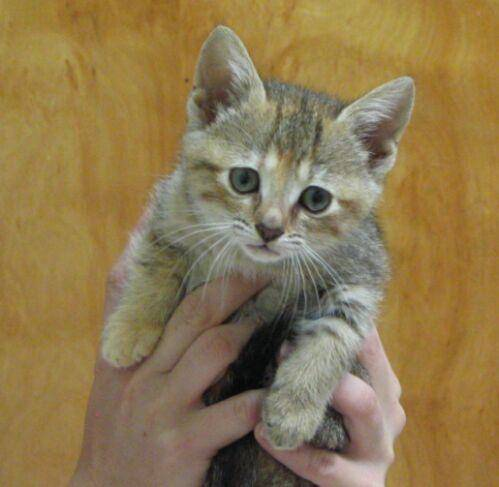

In [2]:
import cv2
from google.colab.patches import cv2_imshow

# Use a valid image path found in the previous step
img = cv2.imread("/kaggle/input/dogs-vs-cats/train/cats/cat.4208.jpg")

if img is not None:
    cv2_imshow(img)
else:
    print("Failed to load image. Check the file path.")


In [ ]:
#############################################################################

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [4]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [6]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
his = model.fit(train_ds,epochs=5)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 103ms/step - accuracy: 0.5842 - loss: 0.7066
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 59ms/step - accuracy: 0.7194 - loss: 0.5458
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.7865 - loss: 0.4422
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.8685 - loss: 0.3038
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 58ms/step - accuracy: 0.9315 - loss: 0.1726


In [10]:
model.predict(test_ds)

157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step


array([[0.9999584 ],
       [0.07094418],
       [0.00523964],
       ...,
       [0.9670017 ],
       [0.03997546],
       [0.961628  ]], dtype=float32)